# Plotting the map

The code below shows how you could create a visualisation for London. It is **optional** to demonstrate.

In [29]:
# Tweak and run the following code to plot your clusters on a map.
# You will need to download the relevant shapefiles from decd.co/da-resources 
# and run adjust the code as needed. The example below is for London.

# Import the relevant libraries
import matplotlib.pyplot as plt

########################################################################################################
### Make sure to install geopandas using conda install geopandas if it is not already on your device ###
### You can do this via the terminal, cmd prompt, or conda prompt ######################################
########################################################################################################

import geopandas as gpd # Geo dataframes and plotting
from shapely import wkt # Converts shape data stored as strings to geometry objects, so they can be plotted

%matplotlib inline

In [30]:
# Load shape data from a file

map_df = pd.read_csv("LDN_MAP_DATA.csv")

# Convert the shapes (stored as strings) to geometry objects

map_df["geometry"] = map_df["geometry"].apply(wkt.loads)

# Convert the df to a GeoPandas df, so it can be plotted

map_df = gpd.GeoDataFrame(map_df, geometry='geometry')

In [31]:
# Merge your existing dataset with the one you've just created
merged = map_df.set_index('NAME').join(london_df.set_index('Borough'))
merged.head()

,HECTARES,geometry,Mean age (2017),"Average income (£, 2015)",cluster
NAME,,,,,
Kingston upon Thames,3726.117,"POLYGON ((516401.600 160201.800, 516407.300 16...",37.1,28635,4
Croydon,8649.441,"POLYGON ((535009.200 159504.700, 535005.500 15...",37.0,30628,4
Bromley,15013.487,"POLYGON ((540373.600 157530.400, 540361.200 15...",40.2,30444,0
Hounslow,5658.541,"POLYGON ((521975.800 178100.000, 521967.700 17...",35.8,33717,1
Ealing,5554.428,"POLYGON ((510253.500 182881.600, 510249.900 18...",36.2,28657,4


(500648.735, 564876.965, 153596.64500000002, 203188.055)

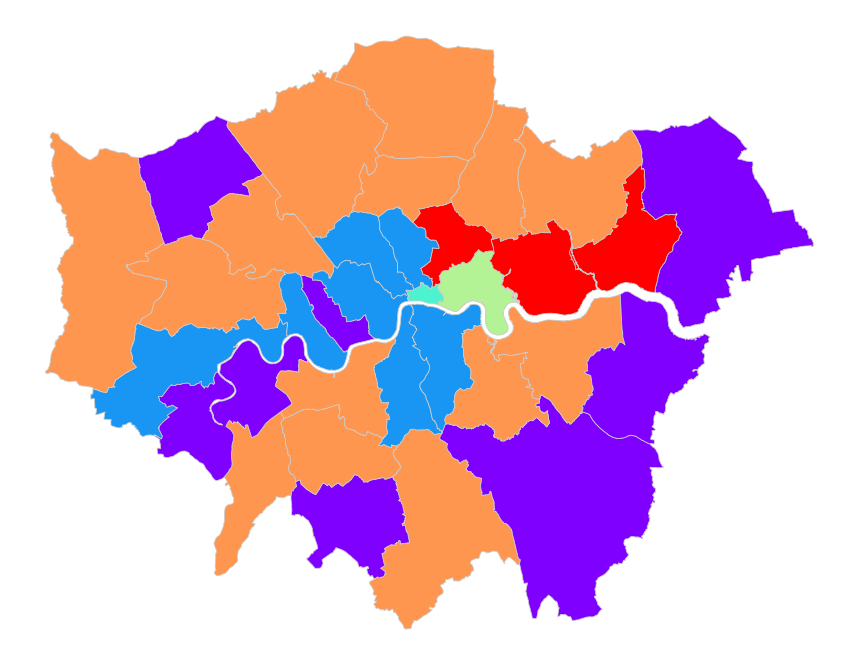

In [32]:
# Set a variable that will call whatever column we want to visualise on the map
variable = 'cluster'
# Set the range for the choropleth
vmin, vmax = 120, 220
# Create a figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))
# Plot the figure
merged.plot(variable, cmap='rainbow', linewidth=0.8, ax=ax, edgecolor='0.8')
# Turn off the axes
ax.axis('off')


In [33]:
# add a title
ax.set_title('Similar boroughs in London', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: London Datastore',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Save the figure as a .png file
fig.savefig('london_clusters.png', dpi=300)